## Setup

In [1]:
# Facial image emotion recognition using CNN
# Target classes: Angry, Disgusted, Fearful, Happy, Sad, Surprised, Neutral

import tensorflow as tf

NUM_THREADS = 32

tf.config.threading.set_intra_op_parallelism_threads(NUM_THREADS)
tf.config.threading.set_inter_op_parallelism_threads(NUM_THREADS)

# Switch to GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
print(physical_devices)
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)


# DATASET
# files in dataset/test and dataset/train
# subfolders: angry, disgusted, fearful, happy, sad, surprised, neutral

# load dataset
train_dir = 'dataset_RAF_DB/train'
test_dir = 'dataset_RAF_DB/test'

model = None
modelName = 'model_RAF_DB_DenseNet'

greyscale = False
augmentation = True

# Number of augmentations per image
num_augmentations = 3

2024-07-09 11:38:28.581020: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-09 11:38:28.605115: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-09 11:38:29.002309: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-07-09 11:38:29.413773: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-09 11:38:29.432946: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-09 11:38:29.432977: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [2]:
# Test data
# Check for the number of images in each class and the size of the images
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'  # 0 = all messages are logged

# List of classes
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Number of images in each class
print('Number of training images in each class:')
for c in classes:
    path = os.path.join(train_dir, c)
    print(f'{c}: {len(os.listdir(path))} images')
    
print('\nNumber of test images in each class:')
for c in classes:
    path = os.path.join(test_dir, c)
    print(f'{c}: {len(os.listdir(path))} images')
    
# Image size
img = cv2.imread('dataset_RAF_DB/train/angry/train_00023_aligned.jpg')
print(f'\nImage size: {img.shape}')

input_shape = img.shape

Number of training images in each class:
angry: 705 images
disgust: 717 images
fear: 281 images
happy: 4772 images
neutral: 2524 images
sad: 1982 images
surprise: 1290 images

Number of test images in each class:
angry: 162 images
disgust: 160 images
fear: 74 images
happy: 1185 images
neutral: 680 images
sad: 478 images
surprise: 329 images

Image size: (100, 100, 3)


## Preparing different models

In [3]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# DenseNet121 model without the top layer and pre-trained weights
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers (not to be trained; unfreeze for fine-tuning after first training)
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

2024-07-09 11:38:29.700183: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-09 11:38:29.700225: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-09 11:38:29.700237: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-09 11:38:29.765782: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-09 11:38:29.765820: I external/local_xla/xla/stream_executor

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 106, 106,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 50, 50,    │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 50, 50,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 50, 50,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 52, 52,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 25, 25,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 25, 25,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 25, 25,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 25, 25,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 25, 25,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 25, 25,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 25, 25,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 25, 25,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 25, 25,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 25, 25,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 25, 25,    │     12,288 │ conv2_block2_0_r

 Total params: 7,565,895 (28.86 MB)

 Trainable params: 528,391 (2.02 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

## Loading the images from disk

In [4]:
def normalize_image(img):
    img = tf.cast(img, tf.float32) / 255.0  # normalize to [0,1] range
    return img

# Load the data
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',  # Integer-Labels
    image_size=(100, 100),
    batch_size=64,
    color_mode='grayscale' if greyscale else 'rgb',
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',  # Integer-Labels
    image_size=(100, 100),
    batch_size=64,
    color_mode='grayscale' if greyscale else 'rgb',
)

# Normalize the images to [0,1]
train_ds = train_ds.map(lambda img, label: (normalize_image(img), label))
test_ds = test_ds.map(lambda img, label: (normalize_image(img), label))

# One-Hot-Encoding of the labels
def one_hot_encode(image, label):
    label = tf.one_hot(label, depth=num_classes)
    return image, label

num_classes = 7

train_ds = train_ds.map(one_hot_encode)
test_ds = test_ds.map(one_hot_encode)

Found 12271 files belonging to 7 classes.
Found 3068 files belonging to 7 classes.


In [5]:
def augment(img, label):
    img = tf.image.random_flip_left_right(img)
    img = tf.image.random_brightness(img, max_delta=0.5)
    img = tf.image.random_contrast(img, lower=0.6, upper=1.4)
    # Some augmentations are only applicable to RGB images
    if not greyscale:
        img = tf.image.random_hue(img, max_delta=0.2)
        img = tf.image.random_saturation(img, lower=0.8, upper=1.2)
    return img, label

def augment_multiple(img, label, num_augmentations=5):
    augmented_images = []
    augmented_labels = []
    for _ in range(num_augmentations):
        augmented_img, augmented_label = augment(img, label)
        augmented_images.append(augmented_img)
        augmented_labels.append(augmented_label)
    return tf.data.Dataset.from_tensor_slices((augmented_images, augmented_labels))

# Augment the training data
if augmentation:
    augmented_datasets = train_ds.flat_map(lambda img, label: augment_multiple(img, label, num_augmentations))
    train_ds = train_ds.concatenate(augmented_datasets)

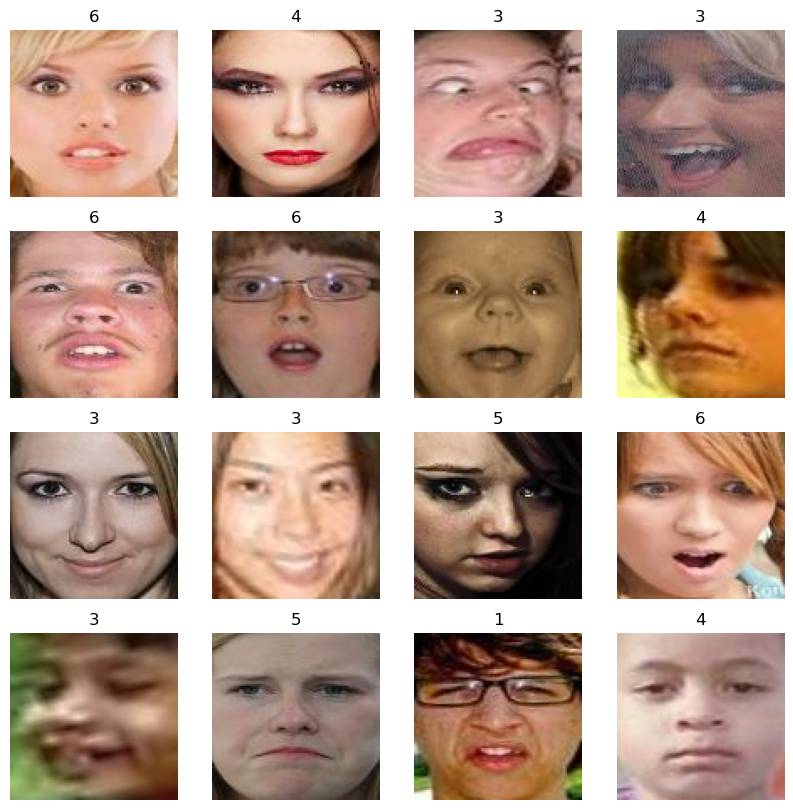

2024-07-09 11:38:42.133275: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Show the first 16 images and their labels
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        if greyscale:
            plt.imshow(np.squeeze(images[i]), cmap='gray')
        else:
            plt.imshow(images[i])
        plt.title(np.argmax(labels[i]))
        plt.axis('off')
    plt.show()


Image shape: (64, 100, 100, 3), Label dtype: <dtype: 'float32'>
Image dtype: <dtype: 'float32'>, Label dtype: <dtype: 'float32'>


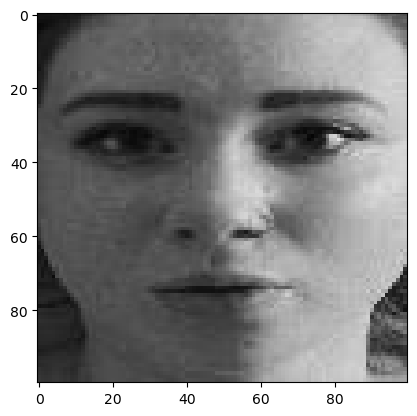

2024-07-09 11:38:42.247385: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [7]:
# Print one image (to confirm whether the images are represented as 48x48x1 tensors)
for img, label in train_ds.take(1):
    print(f"Image shape: {img.shape}, Label dtype: {label.dtype}")
    print(f"Image dtype: {img.dtype}, Label dtype: {label.dtype}")
    
    # Plot the image
    if greyscale:
        plt.imshow(np.squeeze(img[0]), cmap='gray' if greyscale else None)
    else:
        plt.imshow(img[0])
    plt.show()

## Class distribution and weights

In [8]:
import collections

def get_class_distribution(dataset):
    class_counts = collections.Counter()
    
    for _, label_batch in dataset:
        labels = tf.argmax(label_batch, axis=1)
        class_counts.update(labels.numpy())
    
    return class_counts

# Klassenverteilung im Trainingsdatensatz
train_class_distribution = get_class_distribution(train_ds)
print("Train Class Distribution:", train_class_distribution)

# Klassenverteilung im Testdatensatz
test_class_distribution = get_class_distribution(test_ds)
print("Test Class Distribution:", test_class_distribution)


2024-07-09 11:38:47.412447: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Train Class Distribution: Counter({3: 19088, 4: 10096, 5: 7928, 6: 5160, 1: 2868, 0: 2820, 2: 1124})
Test Class Distribution: Counter({3: 1185, 4: 680, 5: 478, 6: 329, 0: 162, 1: 160, 2: 74})


2024-07-09 11:38:47.970475: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [9]:
import sklearn
from sklearn.utils import class_weight

# Load test data
x_train = []
y_train = []

for i, c in enumerate(classes):
    path = os.path.join(train_dir, c)
    for img_name in os.listdir(path):
        # img = cv2.imread(os.path.join(path, img_name))
        if img is not None:  # Ensure the image was read correctly
            # img = cv2.resize(img, (48, 48))
            # x_train.append(img)
            y_train.append(i)

In [10]:
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=7)

# Nehme an, y_train_labels sind die Labels deiner Trainingsdaten
y_train_labels = np.argmax(y_train_encoded, axis=1)
y_train_labels = y_train_labels.astype(np.int32)

# Berechnung der Klassengewichte
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train_labels),
                                                  y=y_train_labels)

# Convert the class weights to a dictionary. Use np.int32 as the key type
class_weights_dict = {int(k): float(v) for k, v in zip(np.unique(y_train_labels), class_weights)}

print("Class weights:", class_weights_dict)
# Print the type of keys in the dictionary
print("Type of keys:", type(list(class_weights_dict.keys())[0]))
# Print the type of values in the dictionary
print("Type of values:", type(list(class_weights_dict.values())[0]))

Class weights: {0: 2.4865248226950354, 1: 2.4449093444909344, 2: 6.238434163701068, 3: 0.3673512154233026, 4: 0.6945324881141046, 5: 0.884460141271443, 6: 1.3589147286821706}
Type of keys: <class 'int'>
Type of values: <class 'float'>


# Custom Callbacks

In [11]:
# Callback function to print the best value of a metric (to roughly predict when the training will finish due to early stopping)
class RecordMetricCallback(tf.keras.callbacks.Callback):
    def __init__(self, metric='val_loss', mode='min'):
        super(RecordMetricCallback, self).__init__()
        self.metric = metric
        self.mode = mode
        self.best_epoch = -1
        self.best_value = None
        if mode == 'min':
            self.best_value = float('inf')
        elif mode == 'max':
            self.best_value = -float('inf')
        else:
            raise ValueError("Mode must be 'min' or 'max'")

    def on_epoch_end(self, epoch, logs=None):
        current_value = logs.get(self.metric)
        if current_value is not None:
            if (self.mode == 'min' and current_value < self.best_value) or (self.mode == 'max' and current_value > self.best_value):
                self.best_value = current_value
                self.best_epoch = epoch
            print(f'Best {self.metric} so far: {self.best_value} (Epoch {self.best_epoch + 1})')

# Callbacks

In [12]:
metric = 'val_accuracy'
mode = 'max'

# Callback functions
early_stopping = tf.keras.callbacks.EarlyStopping(monitor=metric, patience=15, restore_best_weights=True, mode=mode)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor=metric, factor=0.2, patience=5, min_lr=1e-7, mode=mode)
record_val_accuracy = RecordMetricCallback(metric=metric, mode=mode)

In [13]:
for image, label in train_ds.take(1):  # Only take the first batch
    print(label[0])  # Show the label

tf.Tensor([0. 0. 0. 1. 0. 0. 0.], shape=(7,), dtype=float32)


2024-07-09 11:38:48.276108: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## Training & Evaluation

In [14]:
history = model.fit(
    train_ds,
    class_weight=class_weights_dict,
    epochs=5000,
    validation_data=test_ds,
    callbacks=[reduce_lr, early_stopping, record_val_accuracy],
)

Epoch 1/5000


I0000 00:00:1720517932.918213   17707 service.cc:145] XLA service 0x7fcce00015e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1720517932.918244   17707 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Ti, Compute Capability 8.9
2024-07-09 11:38:53.092014: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-09 11:38:54.018850: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1720517934.905704   18167 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_12513', 8 bytes spill stores, 8 bytes spill loads



     13/Unknown 13s 14ms/step - accuracy: 0.1751 - loss: 3.0051

I0000 00:00:1720517940.724778   17707 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


    767/Unknown 30s 23ms/step - accuracy: 0.3434 - loss: 1.8824

2024-07-09 11:39:18.296342: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:39:18.296601: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
/home/renlephy/miniconda3/envs/tf_gpu2/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
I0000 00:00:1720517960.884793   18433 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_3303', 192 bytes spill stores, 192 bytes spill loads

I0000 00:00:1720517960.949731   18448 asm_compiler.cc:369] ptx

768/768 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.3435 - loss: 1.8820 - val_accuracy: 0.4417 - val_loss: 1.5619 - learning_rate: 0.0010
Epoch 2/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4481 - loss: 1.5056

2024-07-09 11:39:40.061606: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:39:40.061799: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.4481 - loss: 1.5057 - val_accuracy: 0.4557 - val_loss: 1.4856 - learning_rate: 0.0010
Epoch 3/5000
765/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4596 - loss: 1.4526

2024-07-09 11:39:51.471514: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:39:51.471757: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.4595 - loss: 1.4528 - val_accuracy: 0.5039 - val_loss: 1.3778 - learning_rate: 0.0010
Epoch 4/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4751 - loss: 1.4054

2024-07-09 11:40:02.433772: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:40:02.434049: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.4751 - loss: 1.4055 - val_accuracy: 0.5013 - val_loss: 1.4065 - learning_rate: 0.0010
Epoch 5/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4818 - loss: 1.3791

2024-07-09 11:40:13.502379: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:40:13.502419: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_6]]
2024-07-09 11:40:13.502441: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14457040157163747396
2024-07-09 11:40:13.502455: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1569972969057621807


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.4818 - loss: 1.3791 - val_accuracy: 0.4801 - val_loss: 1.4298 - learning_rate: 0.0010
Epoch 6/5000
764/768 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4860 - loss: 1.3354

2024-07-09 11:40:24.423645: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:40:24.423810: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.4859 - loss: 1.3358 - val_accuracy: 0.5065 - val_loss: 1.3870 - learning_rate: 0.0010
Epoch 7/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4954 - loss: 1.3153

2024-07-09 11:40:35.453608: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:40:35.453768: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.4953 - loss: 1.3154 - val_accuracy: 0.5362 - val_loss: 1.3128 - learning_rate: 0.0010
Epoch 8/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5030 - loss: 1.2799

2024-07-09 11:40:46.431610: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:40:46.431709: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5030 - loss: 1.2801 - val_accuracy: 0.5134 - val_loss: 1.3501 - learning_rate: 0.0010
Epoch 9/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5114 - loss: 1.2565

2024-07-09 11:40:57.324402: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:40:57.324589: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5113 - loss: 1.2566 - val_accuracy: 0.5140 - val_loss: 1.3531 - learning_rate: 0.0010
Epoch 10/5000
766/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5089 - loss: 1.2378

2024-07-09 11:41:08.504509: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:41:08.504566: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5089 - loss: 1.2379 - val_accuracy: 0.4485 - val_loss: 1.4642 - learning_rate: 0.0010
Epoch 11/5000
765/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5171 - loss: 1.2016

2024-07-09 11:41:20.049952: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:41:20.050280: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5170 - loss: 1.2019 - val_accuracy: 0.5085 - val_loss: 1.3211 - learning_rate: 0.0010
Epoch 12/5000
764/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5290 - loss: 1.1850

2024-07-09 11:41:31.265607: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:41:31.265638: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_6]]
2024-07-09 11:41:31.265665: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1569972969057621807
2024-07-09 11:41:31.265669: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14457040157163747396


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5289 - loss: 1.1853 - val_accuracy: 0.5342 - val_loss: 1.2946 - learning_rate: 0.0010
Epoch 13/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5358 - loss: 1.1438

2024-07-09 11:41:42.448066: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:41:42.448249: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5358 - loss: 1.1438 - val_accuracy: 0.5388 - val_loss: 1.2616 - learning_rate: 2.0000e-04
Epoch 14/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5493 - loss: 1.0976

2024-07-09 11:41:54.059566: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:41:54.059760: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5493 - loss: 1.0977 - val_accuracy: 0.5313 - val_loss: 1.2808 - learning_rate: 2.0000e-04
Epoch 15/5000
765/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5600 - loss: 1.0687

2024-07-09 11:42:05.271425: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:42:05.271681: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5599 - loss: 1.0689 - val_accuracy: 0.5378 - val_loss: 1.2707 - learning_rate: 2.0000e-04
Epoch 16/5000
766/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5602 - loss: 1.0568

2024-07-09 11:42:16.695036: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:42:16.695221: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5602 - loss: 1.0570 - val_accuracy: 0.5310 - val_loss: 1.2872 - learning_rate: 2.0000e-04
Epoch 17/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5595 - loss: 1.0551

2024-07-09 11:42:27.623289: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:42:27.623477: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5594 - loss: 1.0551 - val_accuracy: 0.5440 - val_loss: 1.2467 - learning_rate: 2.0000e-04
Epoch 18/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5696 - loss: 1.0410

2024-07-09 11:42:38.671806: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:42:38.671979: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5695 - loss: 1.0410 - val_accuracy: 0.5378 - val_loss: 1.2613 - learning_rate: 2.0000e-04
Epoch 19/5000
765/768 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5689 - loss: 1.0341

2024-07-09 11:42:49.661517: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:42:49.661717: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5688 - loss: 1.0343 - val_accuracy: 0.5492 - val_loss: 1.2458 - learning_rate: 2.0000e-04
Epoch 20/5000
764/768 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5769 - loss: 1.0153

2024-07-09 11:43:00.562987: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:43:00.563180: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5768 - loss: 1.0157 - val_accuracy: 0.5391 - val_loss: 1.2761 - learning_rate: 2.0000e-04
Epoch 21/5000
766/768 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5738 - loss: 1.0221

2024-07-09 11:43:11.410107: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:43:11.410274: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5737 - loss: 1.0223 - val_accuracy: 0.5306 - val_loss: 1.2883 - learning_rate: 2.0000e-04
Epoch 22/5000
764/768 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5752 - loss: 1.0096

2024-07-09 11:43:22.270541: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:43:22.270701: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5750 - loss: 1.0100 - val_accuracy: 0.5440 - val_loss: 1.2556 - learning_rate: 2.0000e-04
Epoch 23/5000
766/768 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5807 - loss: 1.0046

2024-07-09 11:43:33.147003: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:43:33.147181: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5806 - loss: 1.0048 - val_accuracy: 0.5300 - val_loss: 1.2837 - learning_rate: 2.0000e-04
Epoch 24/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5767 - loss: 0.9992

2024-07-09 11:43:43.962007: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:43:43.962179: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5767 - loss: 0.9993 - val_accuracy: 0.5440 - val_loss: 1.2508 - learning_rate: 2.0000e-04
Epoch 25/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5799 - loss: 0.9822

2024-07-09 11:43:54.927564: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:43:54.927799: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5799 - loss: 0.9823 - val_accuracy: 0.5456 - val_loss: 1.2530 - learning_rate: 4.0000e-05
Epoch 26/5000
765/768 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5845 - loss: 0.9761

2024-07-09 11:44:05.829068: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:44:05.829233: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5845 - loss: 0.9763 - val_accuracy: 0.5453 - val_loss: 1.2522 - learning_rate: 4.0000e-05
Epoch 27/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5794 - loss: 0.9798

2024-07-09 11:44:16.734270: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:44:16.734459: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5794 - loss: 0.9798 - val_accuracy: 0.5466 - val_loss: 1.2553 - learning_rate: 4.0000e-05
Epoch 28/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5829 - loss: 0.9774

2024-07-09 11:44:27.685478: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:44:27.685651: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5829 - loss: 0.9776 - val_accuracy: 0.5450 - val_loss: 1.2528 - learning_rate: 4.0000e-05
Epoch 29/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5853 - loss: 0.9630

2024-07-09 11:44:38.657779: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:44:38.657914: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5853 - loss: 0.9630 - val_accuracy: 0.5469 - val_loss: 1.2489 - learning_rate: 4.0000e-05
Epoch 30/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5855 - loss: 0.9608

2024-07-09 11:44:49.453843: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:44:49.453974: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5854 - loss: 0.9609 - val_accuracy: 0.5489 - val_loss: 1.2437 - learning_rate: 8.0000e-06
Epoch 31/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5863 - loss: 0.9597

2024-07-09 11:45:00.355625: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:45:00.355960: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5862 - loss: 0.9599 - val_accuracy: 0.5508 - val_loss: 1.2435 - learning_rate: 8.0000e-06
Epoch 32/5000
764/768 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5879 - loss: 0.9551

2024-07-09 11:45:11.454088: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:45:11.454221: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5878 - loss: 0.9554 - val_accuracy: 0.5518 - val_loss: 1.2416 - learning_rate: 8.0000e-06
Epoch 33/5000
764/768 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5867 - loss: 0.9527

2024-07-09 11:45:22.380365: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:45:22.380550: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5866 - loss: 0.9530 - val_accuracy: 0.5508 - val_loss: 1.2426 - learning_rate: 8.0000e-06
Epoch 34/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5884 - loss: 0.9624

2024-07-09 11:45:33.389675: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:45:33.389841: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5884 - loss: 0.9624 - val_accuracy: 0.5505 - val_loss: 1.2455 - learning_rate: 8.0000e-06
Epoch 35/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5858 - loss: 0.9598

2024-07-09 11:45:44.820508: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:45:44.820697: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5857 - loss: 0.9599 - val_accuracy: 0.5492 - val_loss: 1.2429 - learning_rate: 8.0000e-06
Epoch 36/5000
766/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5873 - loss: 0.9568

2024-07-09 11:45:56.224958: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:45:56.225132: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5872 - loss: 0.9570 - val_accuracy: 0.5528 - val_loss: 1.2416 - learning_rate: 8.0000e-06
Epoch 37/5000
764/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5890 - loss: 0.9635

2024-07-09 11:46:07.792681: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:46:07.792768: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5889 - loss: 0.9639 - val_accuracy: 0.5489 - val_loss: 1.2443 - learning_rate: 8.0000e-06
Epoch 38/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5892 - loss: 0.9544

2024-07-09 11:46:19.863508: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:46:19.863614: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.5891 - loss: 0.9546 - val_accuracy: 0.5515 - val_loss: 1.2412 - learning_rate: 8.0000e-06
Epoch 39/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5894 - loss: 0.9550

2024-07-09 11:46:31.038032: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:46:31.038221: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5894 - loss: 0.9551 - val_accuracy: 0.5508 - val_loss: 1.2449 - learning_rate: 8.0000e-06
Epoch 40/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5834 - loss: 0.9603

2024-07-09 11:46:42.494004: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:46:42.494273: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5834 - loss: 0.9604 - val_accuracy: 0.5528 - val_loss: 1.2472 - learning_rate: 8.0000e-06
Epoch 41/5000
765/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5867 - loss: 0.9573

2024-07-09 11:46:54.367310: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:46:54.367498: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.5866 - loss: 0.9576 - val_accuracy: 0.5567 - val_loss: 1.2404 - learning_rate: 8.0000e-06
Epoch 42/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5906 - loss: 0.9498

2024-07-09 11:47:05.641409: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:47:05.641456: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5906 - loss: 0.9499 - val_accuracy: 0.5541 - val_loss: 1.2429 - learning_rate: 8.0000e-06
Epoch 43/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5891 - loss: 0.9512

2024-07-09 11:47:16.680516: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:47:16.680692: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5891 - loss: 0.9512 - val_accuracy: 0.5531 - val_loss: 1.2458 - learning_rate: 8.0000e-06
Epoch 44/5000
764/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5867 - loss: 0.9611

2024-07-09 11:47:28.034696: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:47:28.034837: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5866 - loss: 0.9615 - val_accuracy: 0.5531 - val_loss: 1.2435 - learning_rate: 8.0000e-06
Epoch 45/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5877 - loss: 0.9502

2024-07-09 11:47:39.844924: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:47:39.845101: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5877 - loss: 0.9504 - val_accuracy: 0.5528 - val_loss: 1.2439 - learning_rate: 8.0000e-06
Epoch 46/5000
766/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5943 - loss: 0.9418

2024-07-09 11:47:51.150044: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:47:51.150158: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5942 - loss: 0.9420 - val_accuracy: 0.5544 - val_loss: 1.2395 - learning_rate: 8.0000e-06
Epoch 47/5000
764/768 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5874 - loss: 0.9523

2024-07-09 11:48:03.006577: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:48:03.006868: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5873 - loss: 0.9526 - val_accuracy: 0.5544 - val_loss: 1.2392 - learning_rate: 1.6000e-06
Epoch 48/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5890 - loss: 0.9598

2024-07-09 11:48:14.557112: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:48:14.557452: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5890 - loss: 0.9599 - val_accuracy: 0.5551 - val_loss: 1.2390 - learning_rate: 1.6000e-06
Epoch 49/5000
764/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5902 - loss: 0.9463

2024-07-09 11:48:26.019251: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:48:26.019465: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5901 - loss: 0.9467 - val_accuracy: 0.5551 - val_loss: 1.2391 - learning_rate: 1.6000e-06
Epoch 50/5000
765/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5867 - loss: 0.9616

2024-07-09 11:48:37.430645: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:48:37.430824: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5866 - loss: 0.9619 - val_accuracy: 0.5551 - val_loss: 1.2394 - learning_rate: 1.6000e-06
Epoch 51/5000
764/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5852 - loss: 0.9513

2024-07-09 11:48:48.851573: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:48:48.851808: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5851 - loss: 0.9517 - val_accuracy: 0.5551 - val_loss: 1.2394 - learning_rate: 1.6000e-06
Epoch 52/5000
765/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5883 - loss: 0.9525

2024-07-09 11:49:00.208616: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:49:00.208807: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5882 - loss: 0.9527 - val_accuracy: 0.5551 - val_loss: 1.2394 - learning_rate: 3.2000e-07
Epoch 53/5000
764/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5920 - loss: 0.9537

2024-07-09 11:49:11.620181: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:49:11.620439: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5919 - loss: 0.9541 - val_accuracy: 0.5557 - val_loss: 1.2391 - learning_rate: 3.2000e-07
Epoch 54/5000
764/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5856 - loss: 0.9614

2024-07-09 11:49:23.247590: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:49:23.247819: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5856 - loss: 0.9617 - val_accuracy: 0.5554 - val_loss: 1.2390 - learning_rate: 3.2000e-07
Epoch 55/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5885 - loss: 0.9512

2024-07-09 11:49:34.870740: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:49:34.870893: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5884 - loss: 0.9513 - val_accuracy: 0.5561 - val_loss: 1.2388 - learning_rate: 3.2000e-07
Epoch 56/5000
764/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5890 - loss: 0.9551

2024-07-09 11:49:46.324731: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:49:46.324930: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5889 - loss: 0.9555 - val_accuracy: 0.5557 - val_loss: 1.2388 - learning_rate: 3.2000e-07
Epoch 57/5000
764/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5920 - loss: 0.9437

2024-07-09 11:49:57.691390: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:49:57.691542: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5919 - loss: 0.9441 - val_accuracy: 0.5557 - val_loss: 1.2388 - learning_rate: 1.0000e-07
Epoch 58/5000
764/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5899 - loss: 0.9510

2024-07-09 11:50:09.064231: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:50:09.064414: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5898 - loss: 0.9513 - val_accuracy: 0.5557 - val_loss: 1.2388 - learning_rate: 1.0000e-07
Epoch 59/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5892 - loss: 0.9510

2024-07-09 11:50:20.438582: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:50:20.438796: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5892 - loss: 0.9512 - val_accuracy: 0.5557 - val_loss: 1.2388 - learning_rate: 1.0000e-07
Epoch 60/5000
764/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5905 - loss: 0.9468

2024-07-09 11:50:31.800089: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:50:31.800185: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5904 - loss: 0.9472 - val_accuracy: 0.5557 - val_loss: 1.2388 - learning_rate: 1.0000e-07
Epoch 61/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5913 - loss: 0.9505

2024-07-09 11:50:43.191161: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:50:43.191423: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5913 - loss: 0.9507 - val_accuracy: 0.5557 - val_loss: 1.2388 - learning_rate: 1.0000e-07
Epoch 62/5000
764/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5912 - loss: 0.9489

2024-07-09 11:50:54.683349: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:50:54.683528: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5911 - loss: 0.9492 - val_accuracy: 0.5557 - val_loss: 1.2388 - learning_rate: 1.0000e-07
Epoch 63/5000
765/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5872 - loss: 0.9503

2024-07-09 11:51:06.090537: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:51:06.090679: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5871 - loss: 0.9507 - val_accuracy: 0.5557 - val_loss: 1.2388 - learning_rate: 1.0000e-07
Epoch 64/5000
765/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5888 - loss: 0.9476

2024-07-09 11:51:17.397751: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:51:17.397940: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5888 - loss: 0.9479 - val_accuracy: 0.5557 - val_loss: 1.2388 - learning_rate: 1.0000e-07
Epoch 65/5000
764/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5873 - loss: 0.9496

2024-07-09 11:51:28.827361: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:51:28.827410: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14457040157163747396
2024-07-09 11:51:28.827415: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_6]]
2024-07-09 11:51:28.827444: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1569972969057621807


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5872 - loss: 0.9500 - val_accuracy: 0.5557 - val_loss: 1.2388 - learning_rate: 1.0000e-07
Epoch 66/5000
765/768 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5898 - loss: 0.9517

2024-07-09 11:51:40.228069: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:51:40.228164: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


768/768 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5897 - loss: 0.9519 - val_accuracy: 0.5557 - val_loss: 1.2387 - learning_rate: 1.0000e-07


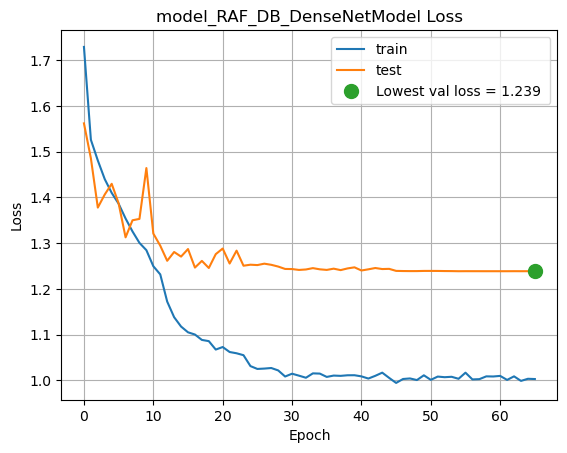

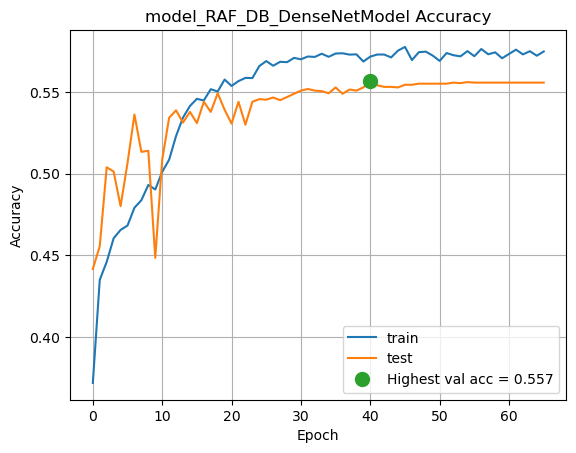

In [15]:
# Plot training history (loss and accuracy)
# Plot the point with the best validation accuracy (early stopping)
# Plot the point with the least validation loss
from textwrap import fill
from turtle import fillcolor, filling


highest_val_acc = np.argmax(history.history['val_accuracy'])
highest_val_acc_item = (highest_val_acc, history.history['val_accuracy'][highest_val_acc])

lowest_val_loss = np.argmin(history.history['val_loss'])
lowest_val_loss_item = (lowest_val_loss, history.history['val_loss'][lowest_val_loss])

plt.plot(history.history['loss'], c="C0", label="train")
plt.plot(history.history['val_loss'], c="C1", label="test")
plt.plot(lowest_val_loss_item[0], lowest_val_loss_item[1], '.', markersize=20, color="C2", label=f"Lowest val loss = {lowest_val_loss_item[1]:.3f} ")
plt.title(modelName + 'Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], c="C0", label="train")
plt.plot(history.history['val_accuracy'], c="C1", label="test")
plt.plot(highest_val_acc_item[0], highest_val_acc_item[1], '.', markersize=20, color="C2", label=f"Highest val acc = {highest_val_acc_item[1]:.3f}")
plt.title(modelName + 'Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.show()

In [16]:
# Fine-tuning
# Unfreeze the base model and train the entire model

for layer in base_model.layers:
    layer.trainable = True

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_ds,
    epochs=5000,
    validation_data=test_ds,
    callbacks=[reduce_lr, early_stopping, record_val_accuracy],
)

Epoch 1/5000


I0000 00:00:1720518762.248375   17704 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_slice_fusion_1', 12 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_compare_reduce_slice_fusion_2', 100 bytes spill stores, 100 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_slice_fusion_2', 84 bytes spill stores, 84 bytes spill loads



    190/Unknown 70s 47ms/step - accuracy: 0.4141 - loss: 1.7643

I0000 00:00:1720518806.286081   17704 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_compare_reduce_slice_fusion_4', 72 bytes spill stores, 72 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_slice_fusion_1', 124 bytes spill stores, 116 bytes spill loads



    768/Unknown 133s 94ms/step - accuracy: 0.5338 - loss: 1.3548

2024-07-09 11:53:54.658537: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:53:54.658577: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-09 11:53:54.658585: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1569972969057621807
2024-07-09 11:53:54.658618: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14457040157163747396
/home/renlephy/miniconda3/envs/tf_gpu2/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.

Best val_accuracy so far: 0.7102347016334534 (Epoch 1)
768/768 ━━━━━━━━━━━━━━━━━━━━ 139s 101ms/step - accuracy: 0.5340 - loss: 1.3544 - val_accuracy: 0.7102 - val_loss: 0.8403 - learning_rate: 1.0000e-04
Epoch 2/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7966 - loss: 0.5782

2024-07-09 11:54:37.303149: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:54:37.304200: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.7777053713798523 (Epoch 2)
768/768 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.7966 - loss: 0.5781 - val_accuracy: 0.7777 - val_loss: 0.6841 - learning_rate: 1.0000e-04
Epoch 3/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8822 - loss: 0.3417

2024-07-09 11:55:15.059134: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:55:15.060406: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.7835723757743835 (Epoch 3)
768/768 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.8822 - loss: 0.3417 - val_accuracy: 0.7836 - val_loss: 0.7014 - learning_rate: 1.0000e-04
Epoch 4/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9281 - loss: 0.2031

2024-07-09 11:55:52.620399: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:55:52.620574: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8089960813522339 (Epoch 4)
768/768 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.9281 - loss: 0.2031 - val_accuracy: 0.8090 - val_loss: 0.6716 - learning_rate: 1.0000e-04
Epoch 5/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9556 - loss: 0.1286

2024-07-09 11:56:29.980313: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:56:29.981597: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8089960813522339 (Epoch 4)
768/768 ━━━━━━━━━━━━━━━━━━━━ 37s 49ms/step - accuracy: 0.9556 - loss: 0.1286 - val_accuracy: 0.7950 - val_loss: 0.7606 - learning_rate: 1.0000e-04
Epoch 6/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9718 - loss: 0.0830

2024-07-09 11:57:06.541940: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:57:06.542254: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8184484839439392 (Epoch 6)
768/768 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.9717 - loss: 0.0830 - val_accuracy: 0.8184 - val_loss: 0.7815 - learning_rate: 1.0000e-04
Epoch 7/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9756 - loss: 0.0722

2024-07-09 11:57:42.600444: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:57:42.600635: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8184484839439392 (Epoch 6)
768/768 ━━━━━━━━━━━━━━━━━━━━ 36s 47ms/step - accuracy: 0.9756 - loss: 0.0722 - val_accuracy: 0.8168 - val_loss: 0.7499 - learning_rate: 1.0000e-04
Epoch 8/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9829 - loss: 0.0524

2024-07-09 11:58:19.158083: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:58:19.158640: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8184484839439392 (Epoch 6)
768/768 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.9829 - loss: 0.0525 - val_accuracy: 0.7986 - val_loss: 0.8605 - learning_rate: 1.0000e-04
Epoch 9/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9819 - loss: 0.0540

2024-07-09 11:58:55.654398: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:58:55.654754: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8184484839439392 (Epoch 6)
768/768 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.9819 - loss: 0.0540 - val_accuracy: 0.8096 - val_loss: 0.8820 - learning_rate: 1.0000e-04
Epoch 10/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9846 - loss: 0.0446

2024-07-09 11:59:32.687546: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 11:59:32.688123: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8279008865356445 (Epoch 10)
768/768 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.9846 - loss: 0.0446 - val_accuracy: 0.8279 - val_loss: 0.8213 - learning_rate: 1.0000e-04
Epoch 11/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9871 - loss: 0.0398

2024-07-09 12:00:09.478979: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:00:09.479549: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8279008865356445 (Epoch 10)
768/768 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.9871 - loss: 0.0398 - val_accuracy: 0.8188 - val_loss: 0.8930 - learning_rate: 1.0000e-04
Epoch 12/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9899 - loss: 0.0312

2024-07-09 12:00:50.872455: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:00:50.873022: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8279008865356445 (Epoch 10)
768/768 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9899 - loss: 0.0312 - val_accuracy: 0.8240 - val_loss: 0.9206 - learning_rate: 1.0000e-04
Epoch 13/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9892 - loss: 0.0314

2024-07-09 12:01:27.462053: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:01:27.462297: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8279008865356445 (Epoch 10)
768/768 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.9892 - loss: 0.0314 - val_accuracy: 0.8243 - val_loss: 1.0189 - learning_rate: 1.0000e-04
Epoch 14/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9872 - loss: 0.0377

2024-07-09 12:02:03.090209: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:02:03.090558: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8279008865356445 (Epoch 10)
768/768 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.9872 - loss: 0.0377 - val_accuracy: 0.8217 - val_loss: 0.9135 - learning_rate: 1.0000e-04
Epoch 15/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9900 - loss: 0.0297

2024-07-09 12:02:38.604743: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:02:38.604882: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8360495567321777 (Epoch 15)
768/768 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.9900 - loss: 0.0297 - val_accuracy: 0.8360 - val_loss: 0.8706 - learning_rate: 1.0000e-04
Epoch 16/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9908 - loss: 0.0272

2024-07-09 12:03:15.615239: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:03:15.615855: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8360495567321777 (Epoch 15)
768/768 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.9908 - loss: 0.0272 - val_accuracy: 0.8256 - val_loss: 0.9070 - learning_rate: 1.0000e-04
Epoch 17/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9928 - loss: 0.0215

2024-07-09 12:03:52.652286: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:03:52.652331: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8360495567321777 (Epoch 15)
768/768 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.9928 - loss: 0.0215 - val_accuracy: 0.8259 - val_loss: 0.8181 - learning_rate: 1.0000e-04
Epoch 18/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9939 - loss: 0.0207

2024-07-09 12:04:28.055686: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:04:28.055768: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8360495567321777 (Epoch 15)
768/768 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 0.9939 - loss: 0.0207 - val_accuracy: 0.8272 - val_loss: 0.9005 - learning_rate: 1.0000e-04
Epoch 19/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9927 - loss: 0.0218

2024-07-09 12:05:03.653829: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:05:03.654004: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8360495567321777 (Epoch 15)
768/768 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.9927 - loss: 0.0218 - val_accuracy: 0.8302 - val_loss: 1.0429 - learning_rate: 1.0000e-04
Epoch 20/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9939 - loss: 0.0181

2024-07-09 12:05:39.099507: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:05:39.099960: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8360495567321777 (Epoch 15)
768/768 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 0.9939 - loss: 0.0181 - val_accuracy: 0.8305 - val_loss: 0.9959 - learning_rate: 1.0000e-04
Epoch 21/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9942 - loss: 0.0183

2024-07-09 12:06:14.531228: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:06:14.531532: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8591916561126709 (Epoch 21)
768/768 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.9942 - loss: 0.0183 - val_accuracy: 0.8592 - val_loss: 0.7705 - learning_rate: 2.0000e-05
Epoch 22/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9994 - loss: 0.0025

2024-07-09 12:06:50.110791: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:06:50.111148: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8591916561126709 (Epoch 21)
768/768 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 0.9994 - loss: 0.0025 - val_accuracy: 0.8585 - val_loss: 0.7987 - learning_rate: 2.0000e-05
Epoch 23/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9995 - loss: 0.0020

2024-07-09 12:07:25.423678: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:07:25.424316: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8591916561126709 (Epoch 21)
768/768 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 0.9995 - loss: 0.0020 - val_accuracy: 0.8566 - val_loss: 0.8068 - learning_rate: 2.0000e-05
Epoch 24/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9994 - loss: 0.0017

2024-07-09 12:08:00.810942: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:08:00.811465: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8591916561126709 (Epoch 21)
768/768 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 0.9994 - loss: 0.0017 - val_accuracy: 0.8576 - val_loss: 0.8388 - learning_rate: 2.0000e-05
Epoch 25/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9996 - loss: 0.0012

2024-07-09 12:08:36.432903: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:08:36.433090: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8591916561126709 (Epoch 21)
768/768 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.9996 - loss: 0.0012 - val_accuracy: 0.8585 - val_loss: 0.8680 - learning_rate: 2.0000e-05
Epoch 26/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9998 - loss: 7.1880e-04

2024-07-09 12:09:12.527876: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:09:12.528545: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8608213663101196 (Epoch 26)
768/768 ━━━━━━━━━━━━━━━━━━━━ 36s 47ms/step - accuracy: 0.9998 - loss: 7.2059e-04 - val_accuracy: 0.8608 - val_loss: 0.9136 - learning_rate: 2.0000e-05
Epoch 27/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9995 - loss: 0.0016

2024-07-09 12:09:47.991881: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:09:47.991917: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-09 12:09:47.991924: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1569972969057621807
2024-07-09 12:09:47.991929: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14457040157163747396


Best val_accuracy so far: 0.8608213663101196 (Epoch 26)
768/768 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 0.9995 - loss: 0.0016 - val_accuracy: 0.8550 - val_loss: 0.9789 - learning_rate: 2.0000e-05
Epoch 28/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9996 - loss: 0.0014

2024-07-09 12:10:23.413384: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:10:23.413872: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8608213663101196 (Epoch 26)
768/768 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 0.9996 - loss: 0.0014 - val_accuracy: 0.8566 - val_loss: 0.9497 - learning_rate: 2.0000e-05
Epoch 29/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9996 - loss: 0.0014

2024-07-09 12:10:58.890579: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:10:58.891199: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8608213663101196 (Epoch 26)
768/768 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 0.9996 - loss: 0.0014 - val_accuracy: 0.8497 - val_loss: 0.9711 - learning_rate: 2.0000e-05
Epoch 30/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9996 - loss: 0.0016

2024-07-09 12:11:34.363050: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:11:34.363567: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8608213663101196 (Epoch 26)
768/768 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 0.9996 - loss: 0.0016 - val_accuracy: 0.8595 - val_loss: 0.9730 - learning_rate: 2.0000e-05
Epoch 31/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9996 - loss: 0.0012

2024-07-09 12:12:09.931092: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:12:09.931706: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8608213663101196 (Epoch 26)
768/768 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.9996 - loss: 0.0012 - val_accuracy: 0.8602 - val_loss: 0.9416 - learning_rate: 2.0000e-05
Epoch 32/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9999 - loss: 4.3912e-04

2024-07-09 12:12:45.228348: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:12:45.228527: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8617992401123047 (Epoch 32)
768/768 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 0.9999 - loss: 4.3955e-04 - val_accuracy: 0.8618 - val_loss: 0.9393 - learning_rate: 4.0000e-06
Epoch 33/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9998 - loss: 4.1486e-04

2024-07-09 12:13:20.855041: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:13:20.855226: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8624511361122131 (Epoch 33)
768/768 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.9998 - loss: 4.1530e-04 - val_accuracy: 0.8625 - val_loss: 0.9548 - learning_rate: 4.0000e-06
Epoch 34/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9999 - loss: 2.8593e-04

2024-07-09 12:13:55.233926: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:13:55.233958: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-09 12:13:55.233966: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1569972969057621807
2024-07-09 12:13:55.233970: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14457040157163747396


Best val_accuracy so far: 0.8634289503097534 (Epoch 34)
768/768 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 0.9999 - loss: 2.8612e-04 - val_accuracy: 0.8634 - val_loss: 0.9350 - learning_rate: 4.0000e-06
Epoch 35/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 2.3356e-04

2024-07-09 12:14:29.643456: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:14:29.643496: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1569972969057621807
2024-07-09 12:14:29.643499: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


Best val_accuracy so far: 0.8644067645072937 (Epoch 35)
768/768 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 1.0000 - loss: 2.3370e-04 - val_accuracy: 0.8644 - val_loss: 0.9449 - learning_rate: 4.0000e-06
Epoch 36/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 2.1300e-04

2024-07-09 12:15:04.054063: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:15:04.054718: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8647327423095703 (Epoch 36)
768/768 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 1.0000 - loss: 2.1331e-04 - val_accuracy: 0.8647 - val_loss: 0.9440 - learning_rate: 4.0000e-06
Epoch 37/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9999 - loss: 3.1850e-04

2024-07-09 12:15:39.568318: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:15:39.569072: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8647327423095703 (Epoch 36)
768/768 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 0.9999 - loss: 3.1869e-04 - val_accuracy: 0.8638 - val_loss: 0.9445 - learning_rate: 4.0000e-06
Epoch 38/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9999 - loss: 2.2525e-04

2024-07-09 12:16:14.975330: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:16:14.975784: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8657105565071106 (Epoch 38)
768/768 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 0.9999 - loss: 2.2544e-04 - val_accuracy: 0.8657 - val_loss: 0.9368 - learning_rate: 4.0000e-06
Epoch 39/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9999 - loss: 2.8796e-04

2024-07-09 12:16:50.134391: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:16:50.134930: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8666883707046509 (Epoch 39)
768/768 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 0.9999 - loss: 2.8799e-04 - val_accuracy: 0.8667 - val_loss: 0.9532 - learning_rate: 4.0000e-06
Epoch 40/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9999 - loss: 2.7148e-04

2024-07-09 12:17:25.617231: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:17:25.617805: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8676662445068359 (Epoch 40)
768/768 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 0.9999 - loss: 2.7172e-04 - val_accuracy: 0.8677 - val_loss: 0.9557 - learning_rate: 4.0000e-06
Epoch 41/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 1.8454e-04

2024-07-09 12:18:01.213672: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:18:01.214197: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8676662445068359 (Epoch 40)
768/768 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 1.0000 - loss: 1.8545e-04 - val_accuracy: 0.8651 - val_loss: 0.9644 - learning_rate: 4.0000e-06
Epoch 42/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9999 - loss: 3.7589e-04

2024-07-09 12:18:36.803603: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:18:36.804110: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8676662445068359 (Epoch 40)
768/768 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.9999 - loss: 3.7605e-04 - val_accuracy: 0.8654 - val_loss: 0.9653 - learning_rate: 4.0000e-06
Epoch 43/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 1.5193e-04

2024-07-09 12:19:17.977185: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:19:17.977435: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8676662445068359 (Epoch 40)
768/768 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 1.0000 - loss: 1.5236e-04 - val_accuracy: 0.8625 - val_loss: 0.9811 - learning_rate: 4.0000e-06
Epoch 44/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 1.5481e-04

2024-07-09 12:19:58.453554: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:19:58.453789: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8676662445068359 (Epoch 40)
768/768 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 1.0000 - loss: 1.5495e-04 - val_accuracy: 0.8657 - val_loss: 0.9746 - learning_rate: 4.0000e-06
Epoch 45/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 1.2027e-04

2024-07-09 12:20:33.876452: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:20:33.876981: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8676662445068359 (Epoch 40)
768/768 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 1.0000 - loss: 1.2038e-04 - val_accuracy: 0.8647 - val_loss: 0.9702 - learning_rate: 4.0000e-06
Epoch 46/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 1.4089e-04

2024-07-09 12:21:09.587028: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:21:09.587437: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8676662445068359 (Epoch 40)
768/768 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 1.0000 - loss: 1.4102e-04 - val_accuracy: 0.8657 - val_loss: 0.9729 - learning_rate: 8.0000e-07
Epoch 47/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 6.1071e-05

2024-07-09 12:21:45.137629: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:21:45.138167: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8676662445068359 (Epoch 40)
768/768 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 1.0000 - loss: 6.1257e-05 - val_accuracy: 0.8670 - val_loss: 0.9621 - learning_rate: 8.0000e-07
Epoch 48/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 5.6864e-05

2024-07-09 12:22:20.362962: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:22:20.363465: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8676662445068359 (Epoch 40)
768/768 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 1.0000 - loss: 5.6903e-05 - val_accuracy: 0.8641 - val_loss: 0.9779 - learning_rate: 8.0000e-07
Epoch 49/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 1.4052e-04

2024-07-09 12:22:55.676290: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:22:55.676777: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8676662445068359 (Epoch 40)
768/768 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 1.0000 - loss: 1.4075e-04 - val_accuracy: 0.8651 - val_loss: 0.9676 - learning_rate: 8.0000e-07
Epoch 50/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 1.1828e-04

2024-07-09 12:23:30.940614: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:23:30.941203: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8676662445068359 (Epoch 40)
768/768 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 1.0000 - loss: 1.1845e-04 - val_accuracy: 0.8651 - val_loss: 0.9659 - learning_rate: 8.0000e-07
Epoch 51/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 1.0148e-04

2024-07-09 12:24:05.325314: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:24:05.325694: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8676662445068359 (Epoch 40)
768/768 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 1.0000 - loss: 1.0155e-04 - val_accuracy: 0.8654 - val_loss: 0.9680 - learning_rate: 1.6000e-07
Epoch 52/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 1.2293e-04

2024-07-09 12:24:40.661558: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:24:40.661790: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8676662445068359 (Epoch 40)
768/768 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 1.0000 - loss: 1.2302e-04 - val_accuracy: 0.8657 - val_loss: 0.9577 - learning_rate: 1.6000e-07
Epoch 53/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 8.3605e-05

2024-07-09 12:25:16.584514: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:25:16.584950: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8676662445068359 (Epoch 40)
768/768 ━━━━━━━━━━━━━━━━━━━━ 36s 47ms/step - accuracy: 1.0000 - loss: 8.3706e-05 - val_accuracy: 0.8647 - val_loss: 0.9669 - learning_rate: 1.6000e-07
Epoch 54/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9999 - loss: 2.0095e-04

2024-07-09 12:25:52.474478: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:25:52.474524: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8676662445068359 (Epoch 40)
768/768 ━━━━━━━━━━━━━━━━━━━━ 36s 47ms/step - accuracy: 0.9999 - loss: 2.0117e-04 - val_accuracy: 0.8667 - val_loss: 0.9591 - learning_rate: 1.6000e-07
Epoch 55/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 6.2433e-05

2024-07-09 12:26:28.034692: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:26:28.035231: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8676662445068359 (Epoch 40)
768/768 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 1.0000 - loss: 6.2485e-05 - val_accuracy: 0.8660 - val_loss: 0.9584 - learning_rate: 1.6000e-07
Epoch 56/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 7.7131e-05

2024-07-09 12:27:03.504090: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:27:03.504478: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8676662445068359 (Epoch 40)
768/768 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 1.0000 - loss: 7.7374e-05 - val_accuracy: 0.8634 - val_loss: 0.9766 - learning_rate: 1.0000e-07
Epoch 57/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 6.7414e-05

2024-07-09 12:27:38.948186: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:27:38.948753: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8676662445068359 (Epoch 40)
768/768 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 1.0000 - loss: 6.7459e-05 - val_accuracy: 0.8660 - val_loss: 0.9658 - learning_rate: 1.0000e-07
Epoch 58/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 8.9329e-05

2024-07-09 12:28:15.216555: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:28:15.217176: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8676662445068359 (Epoch 40)
768/768 ━━━━━━━━━━━━━━━━━━━━ 36s 47ms/step - accuracy: 1.0000 - loss: 8.9381e-05 - val_accuracy: 0.8644 - val_loss: 0.9717 - learning_rate: 1.0000e-07
Epoch 59/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 1.6809e-04

2024-07-09 12:28:52.131935: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:28:52.132503: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8676662445068359 (Epoch 40)
768/768 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 1.0000 - loss: 1.6846e-04 - val_accuracy: 0.8654 - val_loss: 0.9684 - learning_rate: 1.0000e-07
Epoch 60/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 1.3254e-04

2024-07-09 12:29:28.516121: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:29:28.516763: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8676662445068359 (Epoch 40)
768/768 ━━━━━━━━━━━━━━━━━━━━ 36s 47ms/step - accuracy: 1.0000 - loss: 1.3274e-04 - val_accuracy: 0.8654 - val_loss: 0.9695 - learning_rate: 1.0000e-07
Epoch 61/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 1.8039e-04

2024-07-09 12:30:04.820478: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:30:04.820895: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8676662445068359 (Epoch 40)
768/768 ━━━━━━━━━━━━━━━━━━━━ 36s 47ms/step - accuracy: 1.0000 - loss: 1.8057e-04 - val_accuracy: 0.8654 - val_loss: 0.9743 - learning_rate: 1.0000e-07
Epoch 62/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 8.4909e-05

2024-07-09 12:30:41.301492: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:30:41.302106: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8676662445068359 (Epoch 40)
768/768 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 1.0000 - loss: 8.4996e-05 - val_accuracy: 0.8651 - val_loss: 0.9670 - learning_rate: 1.0000e-07
Epoch 63/5000
768/768 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 1.0673e-04

2024-07-09 12:31:17.938191: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:31:17.938377: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8676662445068359 (Epoch 40)
768/768 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 1.0000 - loss: 1.0685e-04 - val_accuracy: 0.8664 - val_loss: 0.9622 - learning_rate: 1.0000e-07
Epoch 64/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9999 - loss: 2.2633e-04

2024-07-09 12:31:53.653367: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:31:53.653676: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


Best val_accuracy so far: 0.8676662445068359 (Epoch 40)
768/768 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.9999 - loss: 2.2634e-04 - val_accuracy: 0.8657 - val_loss: 0.9686 - learning_rate: 1.0000e-07
Epoch 65/5000
767/768 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 8.3136e-05

2024-07-09 12:32:28.572610: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 12:32:28.572646: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-09 12:32:28.572653: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1569972969057621807
2024-07-09 12:32:28.572658: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14457040157163747396


Best val_accuracy so far: 0.8676662445068359 (Epoch 40)
768/768 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 1.0000 - loss: 8.3239e-05 - val_accuracy: 0.8647 - val_loss: 0.9676 - learning_rate: 1.0000e-07


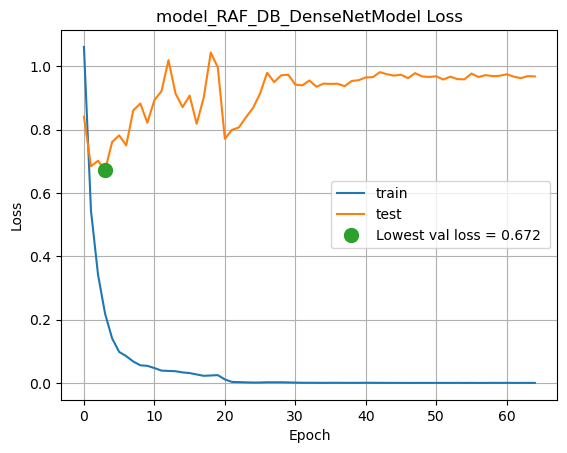

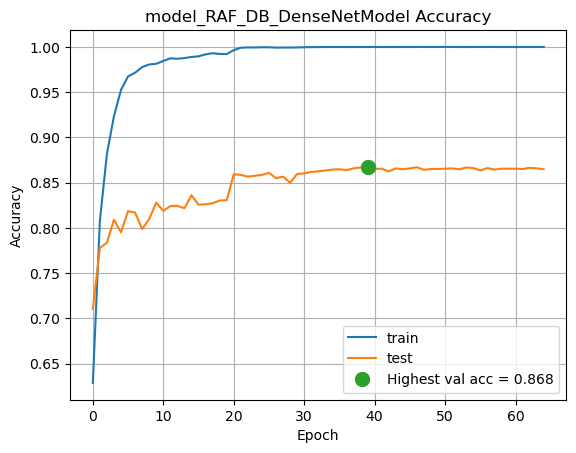

In [17]:
# Plot training history (loss and accuracy)
# Plot the point with the best validation accuracy (early stopping)
# Plot the point with the least validation loss
from textwrap import fill
from turtle import fillcolor, filling


highest_val_acc = np.argmax(history.history['val_accuracy'])
highest_val_acc_item = (highest_val_acc, history.history['val_accuracy'][highest_val_acc])

lowest_val_loss = np.argmin(history.history['val_loss'])
lowest_val_loss_item = (lowest_val_loss, history.history['val_loss'][lowest_val_loss])

plt.plot(history.history['loss'], c="C0", label="train")
plt.plot(history.history['val_loss'], c="C1", label="test")
plt.plot(lowest_val_loss_item[0], lowest_val_loss_item[1], '.', markersize=20, color="C2", label=f"Lowest val loss = {lowest_val_loss_item[1]:.3f} ")
plt.title(modelName + 'Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], c="C0", label="train")
plt.plot(history.history['val_accuracy'], c="C1", label="test")
plt.plot(highest_val_acc_item[0], highest_val_acc_item[1], '.', markersize=20, color="C2", label=f"Highest val acc = {highest_val_acc_item[1]:.3f}")
plt.title(modelName + 'Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.show()

(100, 100, 3)
<class 'numpy.ndarray'>


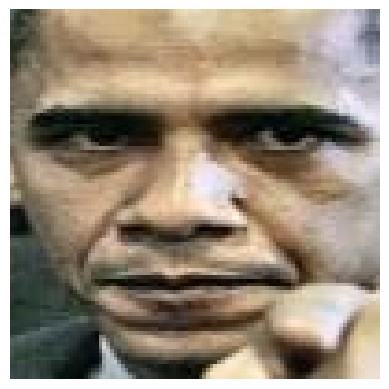

In [18]:
# Load test data
x_test = []
y_test = []

for i, c in enumerate(classes):
    path = os.path.join(test_dir, c)
    for img_name in os.listdir(path):
        img = cv2.imread(os.path.join(path, img_name))
        if img is not None:  # Ensure the image was read correctly
            if greyscale:
                img = cv2.resize(img, (100, 100))
                # Image to greyscale and shape (48, 48, 1)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = np.expand_dims(img, axis=-1)  # Add channel dimension for greyscale images
            else:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # Normalize the image
            img = img / 255.0
            x_test.append(img)
            y_test.append(i)

x_test = np.array(x_test)
y_test = np.array(y_test)

# Bruh, why you taking so long..

y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=7)

# Print one image as matrix
print(x_test[0].shape)
print(type(x_test))
# print(x_test[0])

plt.imshow(x_test[0])
plt.axis('off')
plt.show()

Model saved.


I0000 00:00:1720521159.716778    5964 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_3303', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1720521160.046138    5978 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_3303', 192 bytes spill stores, 192 bytes spill loads



90/96 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8250 - loss: 1.3952

I0000 00:00:1720521166.693568    6060 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_3303', 240 bytes spill stores, 240 bytes spill loads



96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - accuracy: 0.8280 - loss: 1.3639
[0.9584406018257141, 0.8673402667045593]
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.79       162
           1       0.70      0.56      0.62       160
           2       0.76      0.57      0.65        74
           3       0.94      0.95      0.94      1185
           4       0.81      0.88      0.85       680
           5       0.85      0.86      0.85       478
           6       0.87      0.84      0.85       329

    accuracy                           0.87      3068
   macro avg       0.82      0.77      0.79      3068
weighted avg       0.87      0.87      0.87      3068

Confusion Matrix:
 [[ 122    8    3   13    7    7    2]
 [   8   90    1   14   29   13    5]
 [   4    2   42    3    2   12    9]
 [   5    6    0 1124   35    6    9]
 [   2   11    0   24  597   31   15]
 [   2    8   

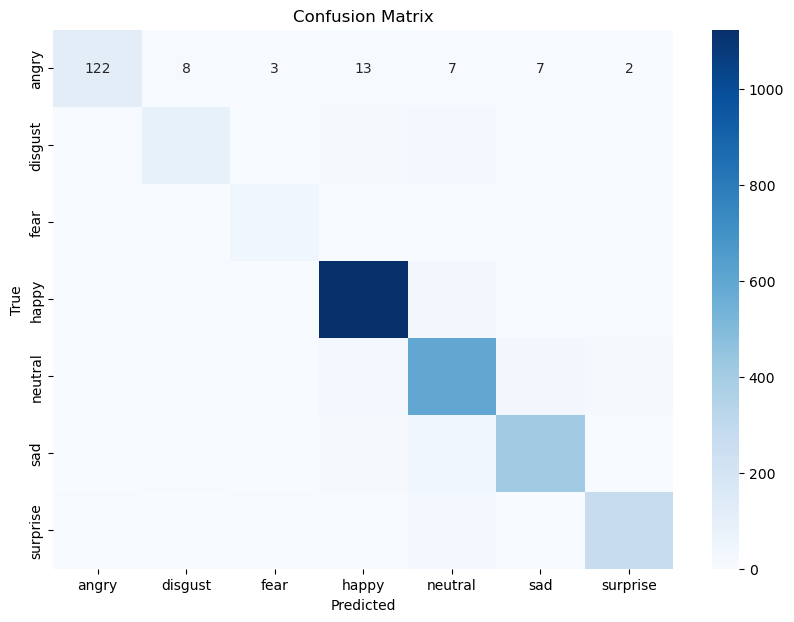

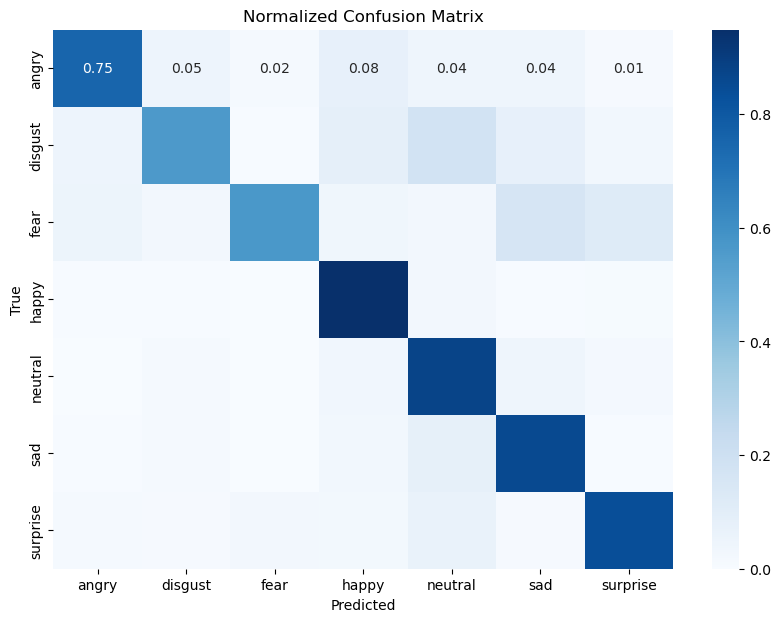

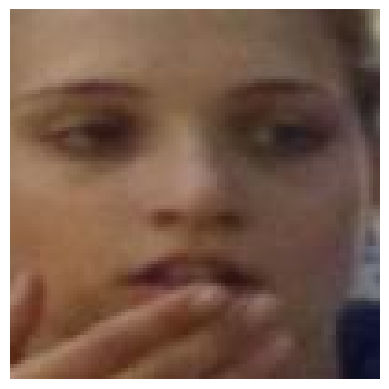

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted emotion: neutral


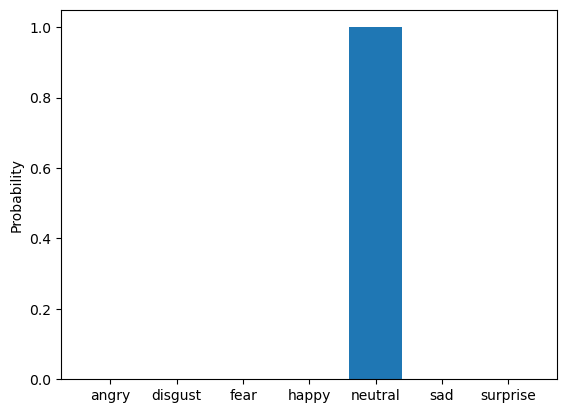

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


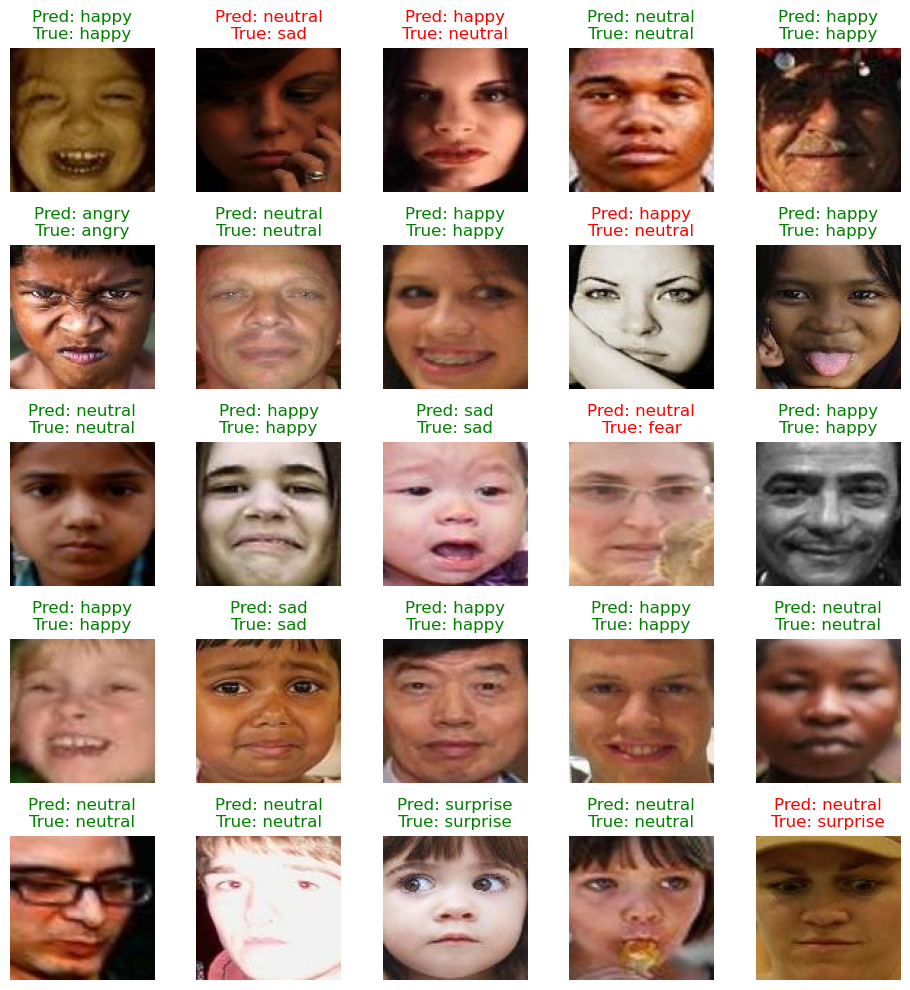

In [19]:
# SAVE MODEL, if model is defined

if model is not None: 
    model.save(modelName + '.keras')
    print('Model saved.')
else:
    # Load model
    model = tf.keras.models.load_model(modelName + '.keras')
    print('Model loaded.')

# Confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

# Evaluate model
evaluation = model.evaluate(x_test, y_test_encoded)

# print evaluation
print(evaluation)

# Predict test data
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import classification_report
print('Classification Report:\n', classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Confusion Matrix:\n", cm)
print("Normalized Confusion Matrix:\n", cm_normalized)

# Display confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Display normalized confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', xticklabels=classes, yticklabels=classes, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()

# TEST MODEL
# Load test image
file_path = 'dataset_RAF_DB/test/angry/test_0037_aligned.jpg'
# random index (with system time as seed)
import random
random.seed()
index = random.randint(0, len(x_test) - 1)
img = x_test[index]

# Display image (back to original size)
# img = np.reshape(img, [100, 100, 3])
plt.imshow(img, cmap='gray' if greyscale else None)
plt.axis('off')
plt.show()

img = x_test[index]
img = np.reshape(img, [1, 100, 100, 3])
# Predict emotion
prediction = model.predict(img)
emotion = classes[np.argmax(prediction)]
print(f'Predicted emotion: {emotion}')

# Display prediction
plt.bar(classes, prediction[0])
plt.ylabel('Probability')
plt.show()

# 5x5 matrix with random pictures from the test set, labeled with the predicted emotion and the true emotion; text color is green if the prediction is correct, red otherwise

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    index = random.randint(0, len(x_test) - 1)
    img = x_test[index]
    img_expanded = np.expand_dims(img, axis=0)
    prediction = model.predict(img_expanded)
    emotion = classes[np.argmax(prediction)]
    true_emotion = classes[y_test[index]]
    color = 'g' if emotion == true_emotion else 'r'
    # Image back to original size
    plt.imshow(img.squeeze(), cmap='gray' if greyscale else None)
    plt.title(f'Pred: {emotion}\nTrue: {true_emotion}', color=color)
    plt.axis('off')
    plt.tight_layout()
    
plt.show()